# In this notebook, we assemble Figure 5 G-Quadruplex boxplot for the TwinC paper. 

In [4]:
import os
import mne
import scipy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

if not os.path.exists(f"../../figures"):
    os.system(f"mkdir ../../figures")
else:
    print(f"figures directory exists")

if not os.path.exists(f"../../figures/g4_analysis"):
    os.system(f"mkdir ../../figures/g4_analysis")
else:
    print(f"g4_analysis figures directory exists")

figures directory exists


In [5]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rcParams['axes.facecolor']='white'
plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

sns.set_theme(style="ticks", palette="pastel")

quad_results_1 = np.load("../../results/g4_analysis/quad_results_computational.npz", allow_pickle=True)
quad_results_2 = np.load("../../results/g4_analysis/quad_results_GSE63874_Na.npz", allow_pickle=True)
quad_results_3 = np.load("../../results/g4_analysis/quad_results_GSM3003539_40.npz", allow_pickle=True)

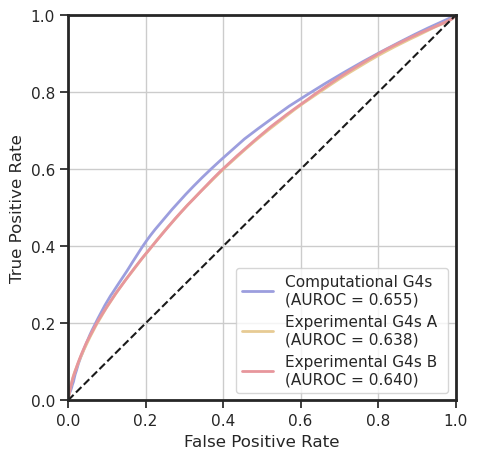

In [6]:
all_quad_results = [quad_results_1, quad_results_2, quad_results_3]
quad_names = ["Computational G4s", "Experimental G4s A", "Experimental G4s B"]

# select a color palette
cmap = matplotlib.cm.get_cmap('tab20b')
colors = [cmap(3), cmap(11), cmap(15)]

figure, axis = plt.subplots(1, 1, figsize=(5, 5))
axis.grid(True)
    
for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(2)

for ii in range(len(all_quad_results)):
    quad_results = all_quad_results[ii]
    quad_name = quad_names[ii]
    peaks_A=quad_results["found_ATAC_peaks_A"]
    peaks_B=quad_results["found_ATAC_peaks_B"]
    top_set=quad_results["top_set"][()]
    
    chrA = "chr9"
    chrB = "chr10"
    selected_resolution = 100000
    
    top_start = 0
    top_end = int(0.25*len(peaks_A))
    
    mid1_start = int(0.25*len(peaks_A))
    mid1_end = int(0.50*len(peaks_A))
    
    mid2_start = int(0.50*len(peaks_A))
    mid2_end = int(0.75*len(peaks_A))
    
    bottom_start = int(0.75*len(peaks_A))
    bottom_end = int(1.0*len(peaks_A))
    
    g_quad_table = []
    for i in range(len(peaks_A)):
        if i >= top_start and i <= top_end:
            quantile = "Top 0%-25%"
        elif i >= mid1_start and i <= mid1_end:
            quantile = "Top 25%-50%"
        elif i >= mid2_start and i <= mid2_end:
            quantile = "Top 50%-75%"
        else:
            quantile = "Top 75%-100%"

        p_i = float(top_set["predictions"][i])
        l_i = float(top_set["labels"][i])
        
        if p_i <= 0.50:
            pred_val = "No Contact"
        else:
            pred_val = "Contact"
            
        p_A = int(peaks_A[i])
        p_B = int(peaks_B[i])
        p_A_B = p_A + p_B
        
        A_loc_start = int(top_set["i"][i])*selected_resolution
        A_loc_end = (int(top_set["i"][i])+1)*selected_resolution
        B_loc_start = int(top_set["j"][i])*selected_resolution
        B_loc_end = (int(top_set["j"][i])+1)*selected_resolution
        g_quad_table.append([chrA, A_loc_start, A_loc_end, chrB, B_loc_start, B_loc_end, 
                             p_A, p_B, p_A_B, p_i, l_i, quantile, pred_val, quad_name])
    
    g_quad_table = pd.DataFrame(g_quad_table)
    g_quad_table.columns = ["chrA", "startA", "endA", "chrB", "startB", "endB", "GQuadA", "GQuadB",
                            "G-Quadruplex Motifs", "PredAB", "LabelAB", "Quantile", "TwinC Prediction", "G4 Approach"]

    roc_score = metrics.roc_auc_score(g_quad_table["LabelAB"], g_quad_table["G-Quadruplex Motifs"])
    
    fpr, tpr, thresholds = metrics.roc_curve(g_quad_table["LabelAB"], g_quad_table["G-Quadruplex Motifs"])
    plt.plot(fpr, tpr, color=colors[ii], linewidth=2.0, label = f"{quad_name} \n(AUROC = {roc_score:0.3f})")

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../../figures/g4_analysis/g4_roc.pdf", transparent=True)
plt.show()

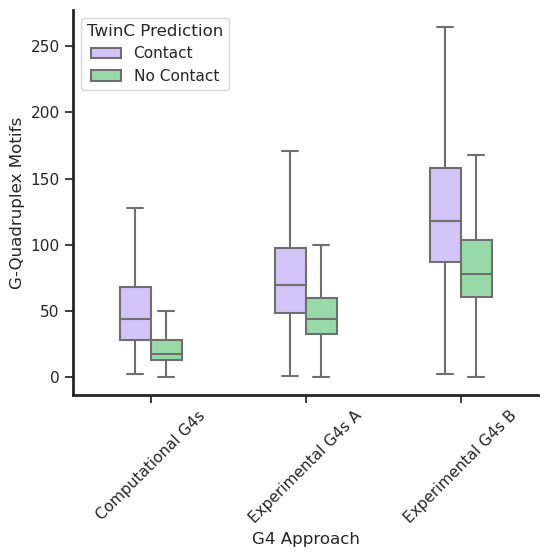

auc_mu_comp: 0.819066457657044, p-value: 0.0
auc_mu_g4_A: 0.7458729112548649, p-value: 0.0
auc_mu_g4_B: 0.7430989582114212, p-value: 0.0


In [7]:
figure, axis = plt.subplots(1, 1, figsize=(6, 5))

for ax in ['top','bottom','left','right']:
    axis.spines[ax].set_linewidth(2)

g_quad_table = []
for ii in range(len(all_quad_results)):
    quad_results = all_quad_results[ii]
    quad_name = quad_names[ii]
    peaks_A=quad_results["found_ATAC_peaks_A"]
    peaks_B=quad_results["found_ATAC_peaks_B"]
    top_set=quad_results["top_set"][()]
    
    chrA = "chr9"
    chrB = "chr10"
    selected_resolution = 100000
    
    top_start = 0
    top_end = int(0.25*len(peaks_A))
    
    mid1_start = int(0.25*len(peaks_A))
    mid1_end = int(0.50*len(peaks_A))
    
    mid2_start = int(0.50*len(peaks_A))
    mid2_end = int(0.75*len(peaks_A))
    
    bottom_start = int(0.75*len(peaks_A))
    bottom_end = int(1.0*len(peaks_A))
    
    
    for i in range(len(peaks_A)):
        if i >= top_start and i <= top_end:
            quantile = "Top 0%-25%"
        elif i >= mid1_start and i <= mid1_end:
            quantile = "Top 25%-50%"
        elif i >= mid2_start and i <= mid2_end:
            quantile = "Top 50%-75%"
        else:
            quantile = "Top 75%-100%"

        p_i = float(top_set["predictions"][i])
        l_i = float(top_set["labels"][i])
        
        if p_i <= 0.50:
            pred_val = "No Contact"
        else:
            pred_val = "Contact"
            
        p_A = int(peaks_A[i])
        p_B = int(peaks_B[i])
        p_A_B = p_A + p_B
        
        A_loc_start = int(top_set["i"][i])*selected_resolution
        A_loc_end = (int(top_set["i"][i])+1)*selected_resolution
        B_loc_start = int(top_set["j"][i])*selected_resolution
        B_loc_end = (int(top_set["j"][i])+1)*selected_resolution
        g_quad_table.append([chrA, A_loc_start, A_loc_end, chrB, B_loc_start, B_loc_end, 
                             p_A, p_B, p_A_B, p_i, l_i, quantile, pred_val, quad_name])
    
g_quad_table = pd.DataFrame(g_quad_table)
g_quad_table.columns = ["chrA", "startA", "endA", "chrB", "startB", "endB", "GQuadA", "GQuadB", "G-Quadruplex Motifs", 
                        "PredAB", "LabelAB", "Quantile", "TwinC Prediction", "G4 Approach"]
g_quad_table.to_csv("../../results/g4_analysis/q4_roc_table.tsv", sep="\t")
    
sns.boxplot(data=g_quad_table, 
            x="G4 Approach", 
            y="G-Quadruplex Motifs", 
            hue="TwinC Prediction", 
            showfliers=False, 
            width=0.4, 
            linewidth=1.5, 
            palette=["m", "g"],
            ax=axis)
axis.set_xticks([0, 1, 2])
axis.set_xticklabels(quad_names, rotation=45)
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
plt.savefig("../../figures/g4_analysis/g4_twinc_pred.pdf", transparent=True)
plt.show()


no_contact_gquad = g_quad_table[g_quad_table["TwinC Prediction"] == "No Contact"]
no_contact_g4_comp = no_contact_gquad[no_contact_gquad["G4 Approach"] == "Computational G4s"]["G-Quadruplex Motifs"]
no_contact_g4_A = no_contact_gquad[no_contact_gquad["G4 Approach"] == "Experimental G4s A"]["G-Quadruplex Motifs"]
no_contact_g4_B = no_contact_gquad[no_contact_gquad["G4 Approach"] == "Experimental G4s B"]["G-Quadruplex Motifs"]

contact_gquad = g_quad_table[g_quad_table["TwinC Prediction"] == "Contact"]
contact_g4_comp = contact_gquad[contact_gquad["G4 Approach"] == "Computational G4s"]["G-Quadruplex Motifs"]
contact_g4_A = contact_gquad[contact_gquad["G4 Approach"] == "Experimental G4s A"]["G-Quadruplex Motifs"]
contact_g4_B = contact_gquad[contact_gquad["G4 Approach"] == "Experimental G4s B"]["G-Quadruplex Motifs"]

mwu_comp = stats.mannwhitneyu(contact_g4_comp, no_contact_g4_comp, alternative="greater")
auc_mu_comp = mwu_comp[0]/(len(contact_g4_comp)*len(no_contact_g4_comp))

mwu_g4_A = stats.mannwhitneyu(contact_g4_A, no_contact_g4_A, alternative="greater")
auc_mu_g4_A = mwu_g4_A[0]/(len(contact_g4_A)*len(no_contact_g4_A))

mwu_g4_B = stats.mannwhitneyu(contact_g4_B, no_contact_g4_B, alternative="greater")
auc_mu_g4_B = mwu_g4_B[0]/(len(contact_g4_B)*len(no_contact_g4_B))

print(f"auc_mu_comp: {auc_mu_comp}, p-value: {mwu_comp[1]}")
print(f"auc_mu_g4_A: {auc_mu_g4_A}, p-value: {mwu_g4_A[1]}")
print(f"auc_mu_g4_B: {auc_mu_g4_B}, p-value: {mwu_g4_B[1]}")